

# Read files, Linear algebra, and  Markov Chain simulation
##### Keywords: Linear algebra, Markov Chain

In [3]:
%matplotlib inline
import numpy as np


In [5]:
import os

## store current working directory
cwd      = os.getcwd() 

## where we store data files
datapath = cwd + u'/data/'

# Now to access data stored in the subfolder data
## You cannot access houston_weather.txt simply by :
## np.loadtxt('weather_comma.txt', delimiter=',')


In [6]:
## You cannot access houston_weather.txt simply by 
## np.loadtxt('houston_weather.txt', delimiter=',')
weather = np.loadtxt(datapath + 'weather_space.txt')

## Linear algebra and Markov Matrix

In [8]:
weather = np.loadtxt(datapath + 'weather_space.txt')
print(weather)

[[ 0.5   0.25  0.25]
 [ 0.5   0.    0.5 ]
 [ 0.25  0.25  0.5 ]]


## The following are NOT matrix square or matrix product
## They are just entrywise operations

In [9]:
print("This is NOT a matrix product, but entrywise squared!!!\n", weather**2)
print("\nThis is NOT a matrix product, but entrywise product!!!\n", weather*weather)
print("\nThis is NOT a matrix inverse, but entrywise inverse!!!\n", weather**(-1))

This is NOT a matrix product, but entrywise squared!!!
 [[ 0.25    0.0625  0.0625]
 [ 0.25    0.      0.25  ]
 [ 0.0625  0.0625  0.25  ]]

This is NOT a matrix product, but entrywise product!!!
 [[ 0.25    0.0625  0.0625]
 [ 0.25    0.      0.25  ]
 [ 0.0625  0.0625  0.25  ]]

This is NOT a matrix inverse, but entrywise inverse!!!
 [[  2.   4.   4.]
 [  2.  inf   2.]
 [  4.   4.   2.]]


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in reciprocal
  This is separate from the ipykernel package so we can avoid doing imports until



# A Matrix is a 2D array that stores real or complex numbers. 
# You can use numpy to create matrices:

In [10]:
A1 = np.array(    
    [[0, 4],
     [2, 0]]
)

A2 = np.array(
    [[-1, 2,2],
     [1, -2,2]]
)


In [11]:
print(A1.shape, A2.shape)


(2, 2) (2, 3)


## As matrices, A1*A2 is defined, and the product should be a 2 by 3 matrix

In [12]:
## A1*A2 this will not Run!!

matrix1 = np.matrix(
    [[0, 4],
     [2, 0]]
)
matrix2 = np.matrix(
    [[-1, 2,2],
     [1, -2,2]]
)

matrix1*matrix2

matrix([[ 4, -8,  8],
        [-2,  4,  4]])

## To take product between matrices A and B
1. where A is of shape (m by n) and B is of shape (k by h)
1. A*B is defined if and only if n=k
l. matrix2 $*$ matrix1 does not run is because you cannot take product between them
1. as matrix2 is of shape (2 by 3) and matrix1 is of shape (2 by 2)

In [13]:
## This doesn't run because the shapes of matrices do not match
matrix2*matrix1

ValueError: shapes (2,3) and (2,2) not aligned: 3 (dim 1) != 2 (dim 0)

# if one of the "arrays" is of matrix type, you are doing matrix operation!!

In [15]:
print(matrix1 * matrix2)
print(matrix1 * A2)

[[ 4 -8  8]
 [-2  4  4]]
[[ 4 -8  8]
 [-2  4  4]]


# np.linalg -- linalg is the linear algebra modulo in python
# linalg: https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.linalg.html

1. from np import linalg as lin
1. lin.det -- determinant
1. eigenvalues
1. etc..

In [16]:
from numpy import linalg as lin
print(matrix1)
det = lin.det(matrix1)
print('determinant(matrix1)', det)

[[0 4]
 [2 0]]
determinant(matrix1) -8.0


Eigenvalues & Eigenvectors
Let A be an n x n matrix. The number λ is an eigenvalue of A if there exists a non-zero vector C such that

Av = λv

In this case, vector v is called an eigenvector of A corresponding to λ. You can use numpy to calculate the eigenvalues and eigenvectors of a matrix:

The input matrix can either be matrix type or 2d array type

In [17]:
print(A1)
eigvals_a = lin.eigvals(A1)
print( eigvals_a)

eigvals_m = lin.eigvals(matrix1)
print(eigvals_m)


[[0 4]
 [2 0]]
[ 2.82842712 -2.82842712]
[ 2.82842712 -2.82842712]


In [18]:
A = np.array([
 [1,2,3,4],   
 [0,2,3,4],  
 [0,0,3,4], 
 [1,2,3,4],
])

eigvals_a = np.round(lin.eigvals(A),3)
print(eigvals_a)


[ 8.831+0.j    -0.000+0.j     0.584+0.581j  0.584-0.581j]


## Solve linear equations Ax = b


In [19]:
A = matrix1
b = np.array([1,1])
solu = lin.solve(A,b)
solu

array([ 0.5 ,  0.25])

## If A is invertable, then x is $A^{-1}b$ 

In [20]:
invA = A**(-1)

## But you cannot take invA*b
## you can see that the solu above and invA*b here have different shapes of out put
## even if the values agree.

b = b.reshape((2,1))
invA*b

matrix([[ 0.5 ],
        [ 0.25]])

## Now we want to test what we have seen about markov chain step matrix

In [21]:
weather = np.loadtxt(datapath + 'weather_comma.txt',delimiter=',')
P = np.matrix(weather)


In [23]:
power_list = list()
Pk = np.eye(3)
for power in np.arange(0,11):
    Pk = P*Pk## If you don't do rounding, you will not see powers agree
    power_list.append(Pk)

for power in np.arange(2,10):
    print("\nP to the power ", power)
    print(power_list[power-1])
    print('if equals previous power,',
          np.array_equal(power_list[power-1] , power_list[power-2]  )
         )


P to the power  2
[[ 0.4375  0.1875  0.375 ]
 [ 0.375   0.25    0.375 ]
 [ 0.375   0.1875  0.4375]]
if equals previous power, False

P to the power  3
[[ 0.40625   0.203125  0.390625]
 [ 0.40625   0.1875    0.40625 ]
 [ 0.390625  0.203125  0.40625 ]]
if equals previous power, False

P to the power  4
[[ 0.40234375  0.19921875  0.3984375 ]
 [ 0.3984375   0.203125    0.3984375 ]
 [ 0.3984375   0.19921875  0.40234375]]
if equals previous power, False

P to the power  5
[[ 0.40039062  0.20019531  0.39941406]
 [ 0.40039062  0.19921875  0.40039062]
 [ 0.39941406  0.20019531  0.40039062]]
if equals previous power, False

P to the power  6
[[ 0.40014648  0.19995117  0.39990234]
 [ 0.39990234  0.20019531  0.39990234]
 [ 0.39990234  0.19995117  0.40014648]]
if equals previous power, False

P to the power  7
[[ 0.40002441  0.20001221  0.39996338]
 [ 0.40002441  0.19995117  0.40002441]
 [ 0.39996338  0.20001221  0.40002441]]
if equals previous power, False

P to the power  8
[[ 0.40000916  0.1999

In [24]:
power_list = list()
Pk = np.eye(3)
for power in np.arange(0,11):
    Pk = np.round(P*Pk,2) ## added rounding and then you can see powers agree
    power_list.append(Pk)

for power in np.arange(2,10):
    print("\nP to the power ", power)
    print(power_list[power-1])
    print('if equals previous power,',
          np.array_equal(power_list[power-1] , power_list[power-2]  )
         )


P to the power  2
[[ 0.44  0.19  0.38]
 [ 0.38  0.25  0.38]
 [ 0.38  0.19  0.44]]
if equals previous power, False

P to the power  3
[[ 0.41  0.2   0.4 ]
 [ 0.41  0.19  0.41]
 [ 0.4   0.2   0.41]]
if equals previous power, False

P to the power  4
[[ 0.41  0.2   0.4 ]
 [ 0.4   0.2   0.4 ]
 [ 0.4   0.2   0.41]]
if equals previous power, False

P to the power  5
[[ 0.4  0.2  0.4]
 [ 0.4  0.2  0.4]
 [ 0.4  0.2  0.4]]
if equals previous power, False

P to the power  6
[[ 0.4  0.2  0.4]
 [ 0.4  0.2  0.4]
 [ 0.4  0.2  0.4]]
if equals previous power, True

P to the power  7
[[ 0.4  0.2  0.4]
 [ 0.4  0.2  0.4]
 [ 0.4  0.2  0.4]]
if equals previous power, True

P to the power  8
[[ 0.4  0.2  0.4]
 [ 0.4  0.2  0.4]
 [ 0.4  0.2  0.4]]
if equals previous power, True

P to the power  9
[[ 0.4  0.2  0.4]
 [ 0.4  0.2  0.4]
 [ 0.4  0.2  0.4]]
if equals previous power, True


## Now let's work with the rat's moving 

In [25]:
import pandas as pd
r = np.matrix(pd.read_table(datapath+'rat.txt',delimiter=',',header = None).values)

### Consider a rat in a maze with 3 cells, indexed as 1,2,3 and the outside (freedom), indexed by 4 (that can only be reached via cell 3). 
### The rat starts initially in a given cell and then takes a move to another cell, continuing to do so until finally reaching freedom. 

## Goal: simulate rat moving around and count steps it takes to get to freedom
<img src="4rat.png" alt="Drawing" style="width: 300px;"/>


In [36]:
S = [1,2,3,4]
import random
import numpy as np
## start moving from location i, 
## number of steps it takes to get to freedom
## recursion
def steps(i):
    print(i,'->')
    if(i==1):
        next_move = 2
        return 1+steps(next_move)
    
    if(i == 2):
        next_move = random.choice([1,3,4])
        return 1+steps(next_move)
        
    if(i == 3):
        next_move = 2
        return 1+steps(next_move)
    
    if(i == 4):
        return 1
    

In [37]:
for run in range(10):
    print('start at cell',2)
    print(steps(2))

start at cell 2
2 ->
3 ->
2 ->
4 ->
4
start at cell 2
2 ->
4 ->
2
start at cell 2
2 ->
1 ->
2 ->
4 ->
4
start at cell 2
2 ->
3 ->
2 ->
3 ->
2 ->
4 ->
6
start at cell 2
2 ->
1 ->
2 ->
4 ->
4
start at cell 2
2 ->
1 ->
2 ->
4 ->
4
start at cell 2
2 ->
4 ->
2
start at cell 2
2 ->
4 ->
2
start at cell 2
2 ->
1 ->
2 ->
4 ->
4
start at cell 2
2 ->
1 ->
2 ->
1 ->
2 ->
1 ->
2 ->
1 ->
2 ->
1 ->
2 ->
4 ->
12


## I want to count in general, 
## on average how many steps it takes to start from cell 2 and ends with freedom
<img src="4rat.png" alt="Drawing" style="width: 300px;"/>


In [38]:
## Run N = 100 times, each time compute average of 50 moves

def steps(i): 
    #print(i,'->') turn off print to run simulations
    if(i==1):
        next_move = 2
        return 1+steps(next_move)
    
    if(i == 2):
        next_move = random.choice([1,3,4])
        return 1+steps(next_move)
        
    if(i == 3):
        next_move = 2
        return 1+steps(next_move)
    
    if(i == 4):
        return 1
    
    
Run_total = np.zeros(100)
N_move    = 50

for each_run in range(100):
    move = np.zeros(N_move)
    for each_move in range(N_move):
        move[each_move] = steps(3)
    Run_total[each_run] = np.mean(move)

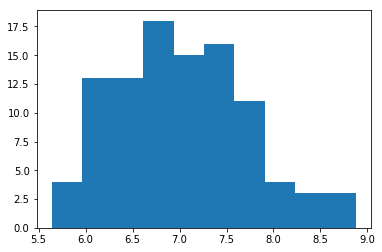

In [39]:
import matplotlib.pyplot as plt

plt.hist(Run_total,bins = 10)
plt.show()